# Kamień milowy 3 - modelowanie

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# wczytanie nazw kolumn
with open('./UCI_HAR_Dataset/features.txt') as f:
    col_names = f.readlines()
    col_names = [x.split()[1] for x in col_names]

In [ ]:
# wczytanie X_train
X_train = pd.read_csv('./UCI_HAR_Dataset/train/X_train.txt', header=None)
list_matrix = []
for row in X_train.values:
    list_matrix.append(row[0].split())
X_train = pd.DataFrame(data=list_matrix)

# wczytanie X_test
X_test = pd.read_csv('./UCI_HAR_Dataset/test/X_test.txt', header=None)
list_matrix = []
for row in X_test.values:
    list_matrix.append(row[0].split())
X_test = pd.DataFrame(data=list_matrix)

#dołącznie nazw kolumn
X_train.columns = col_names
X_test.columns = col_names

y_train = pd.read_csv("./UCI_HAR_Dataset/train/y_train.txt", header=None)
subject_train = pd.read_csv("./UCI_HAR_Dataset/train/subject_train.txt", header=None)
y_test = pd.read_csv("./UCI_HAR_Dataset/test/y_test.txt", header=None)
subject_test = pd.read_csv("./UCI_HAR_Dataset/test/subject_test.txt", header=None)

# w1 = pd.concat([y_train, y_test])
# w2 = pd.concat([subject_train, subject_test])

x_train = X_train.applymap(float)
x_test = X_test.applymap(float)


Odtwórzmy t-SNE z poprzedniego kamienia milowego, by spojrzeć na wyniki

In [ ]:
from sklearn.manifold import TSNE
t = TSNE(n_components = 2).fit_transform(x_train)
t = pd.DataFrame(t)
t.columns = ['t-SNE-1', 't-SNE-2']

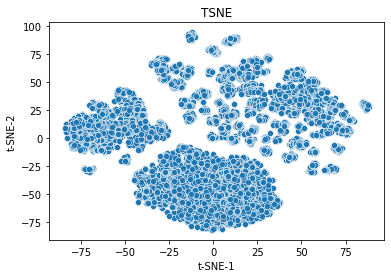

In [ ]:
sns.scatterplot(data = t, x = 't-SNE-1', y = 't-SNE-2')
plt.title('TSNE')
plt.show()

## DBSCAN

In [ ]:
def count_clustering_scores0(X, cluster_num, model_class, score_fun):
    # Napiszmy tę funkcje tak ogólnie, jak to możliwe. 
    # Zwróćcie uwagę na przekazanie obiektów typu callable: model i score_fun.
    if isinstance(cluster_num, int):
        cluster_num_iter = [cluster_num]
    else:
        cluster_num_iter = cluster_num
        
    scores = []    
    for k in cluster_num_iter:
        model_instance = model_class(eps=k)
        labels = model_instance.fit_predict(X)
        wcss = score_fun(X, labels)
        scores.append(wcss)
    
    if isinstance(cluster_num, int):
        return scores[0]
    else:
        return scores

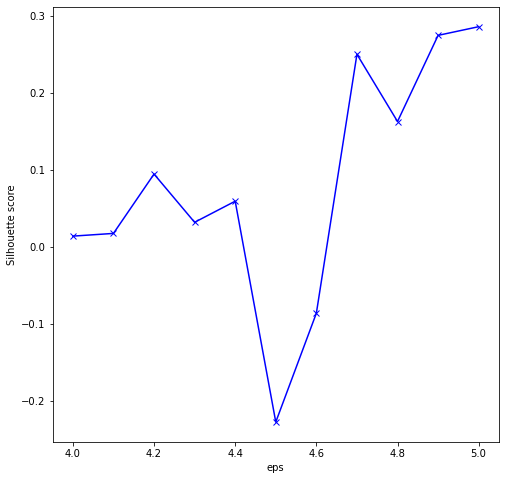

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

q = [4, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5]
cluster_num_seq = iter(q)
silhouette_vec = count_clustering_scores0(x_train, cluster_num_seq, DBSCAN, silhouette_score)
f = plt.figure(figsize=(8, 8))
plt.plot(q, silhouette_vec, 'bx-')
plt.xlabel('eps')
plt.ylabel('Silhouette score')
plt.show()

In [ ]:
def plot_dbscan(X, t, eps):
    dbs = DBSCAN(eps = eps)
    dbs.fit(X)
    labels = [str(x) for x in dbs.labels_]

    t1 = t.copy()
    t1['hue'] = labels

    sns.scatterplot(data = t1, x = 't-SNE-1', y = 't-SNE-2', hue = 'hue')
    plt.title('TSNE')
    plt.show()

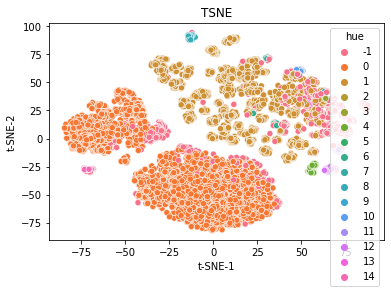

In [ ]:
plot_dbscan(x_train, t, 4.1)

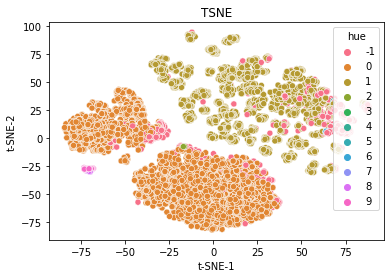

In [ ]:
plot_dbscan(x_train, t, 4.3)

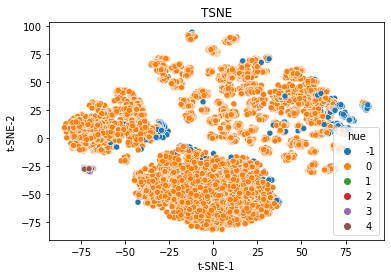

In [ ]:
plot_dbscan(x_train, t, 4.5)

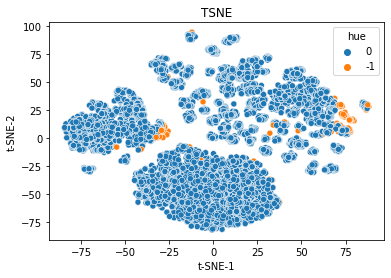

In [ ]:
plot_dbscan(x_train, t, 5)

Z tego algorytmu nic nie wynika, Silhouette score jest niski (nawet ujemny) i mocno się waha

## K-Means

In [ ]:
def count_clustering_scores(X, cluster_num, model_class, score_fun):
    # Napiszmy tę funkcje tak ogólnie, jak to możliwe. 
    # Zwróćcie uwagę na przekazanie obiektów typu callable: model i score_fun.
    if isinstance(cluster_num, int):
        cluster_num_iter = [cluster_num]
    else:
        cluster_num_iter = cluster_num
        
    scores = []    
    for k in cluster_num_iter:
        model_instance = model_class(n_clusters=k)
        labels = model_instance.fit_predict(X)
        wcss = score_fun(X, labels)
        scores.append(wcss)
    
    if isinstance(cluster_num, int):
        return scores[0]
    else:
        return scores

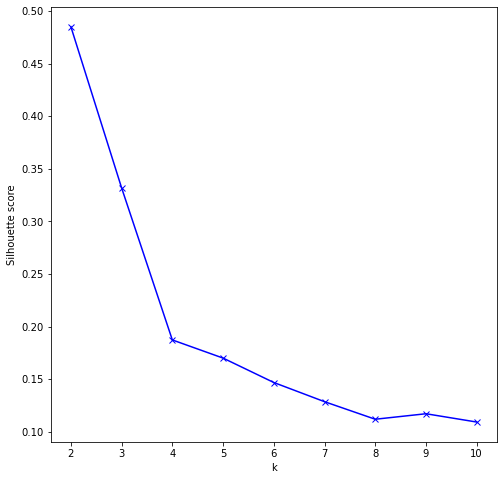

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

cluster_num_seq = range(2, 11)
silhouette_vec = count_clustering_scores(x_train, cluster_num_seq, KMeans, silhouette_score)
f = plt.figure(figsize=(8, 8))
plt.plot(cluster_num_seq, silhouette_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.show()

In [ ]:
!pip install yellowbrick==1.3

     |████████████████████████████████| 271 kB 2.0 MB/s eta 0:00:01


In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

def kmeans_SilhouetteVisualizer_tsne(X, t, n):
    kmeans = KMeans(n_clusters = n).fit(X)

    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
    visualizer.fit(X)
    visualizer.show()

    
    labels = [str(x) for x in kmeans.labels_]

    t1 = t.copy()
    t1['hue'] = labels

    sns.scatterplot(data = t1, x = 't-SNE-1', y = 't-SNE-2', hue = 'hue')
    plt.title('TSNE')
    plt.show()

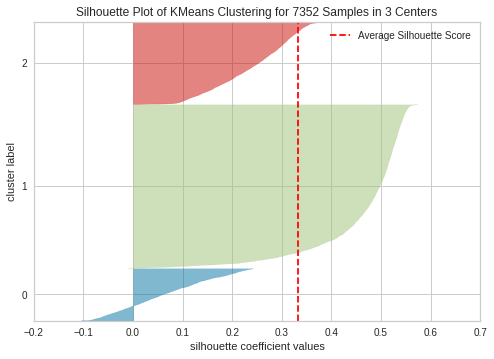

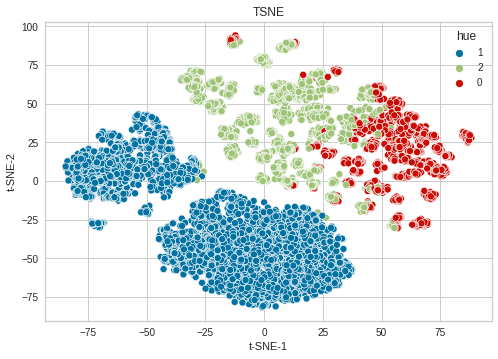

In [ ]:
kmeans_SilhouetteVisualizer_tsne(x_train, t, 3)

Trzy klastry to zbyt mała liczba, jedna klasa jest bardzo liczna, podczas gdy w drugiej nie ma żadnego wyniku w okolicach średniej.

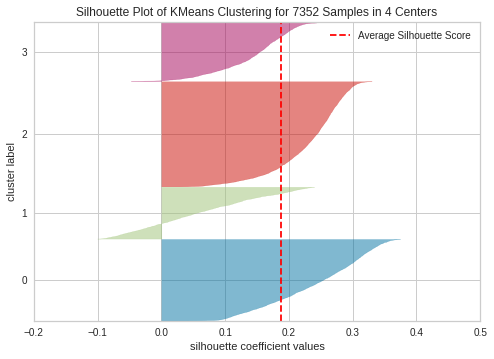

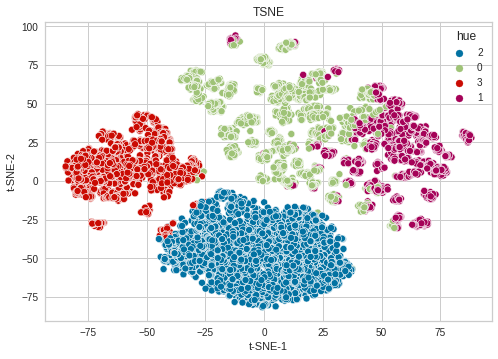

In [ ]:
kmeans_SilhouetteVisualizer_tsne(x_train, t, 4)

Cztery klastry wyglądają w miarę sensownie

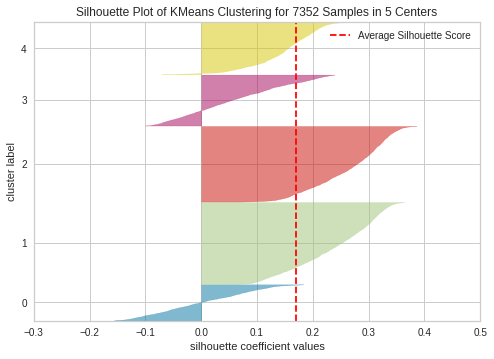

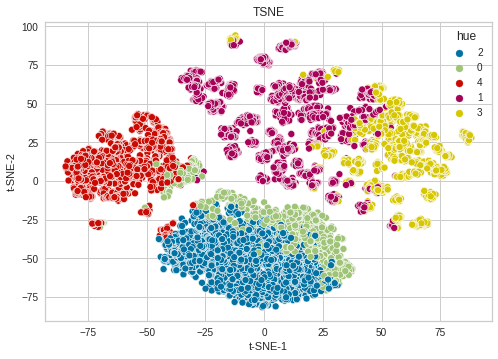

In [ ]:
kmeans_SilhouetteVisualizer_tsne(x_train, t, 5)

Pięć klastrów to za dużo - w trzech z nich sporo próbek ma wartości ujemne Silhouette Score.

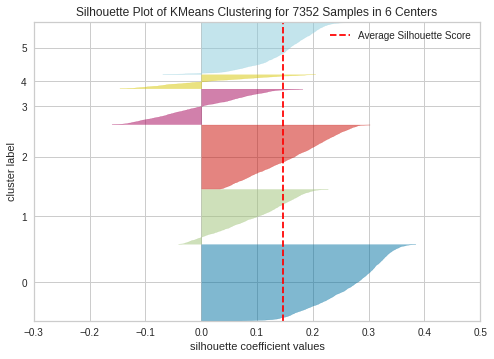

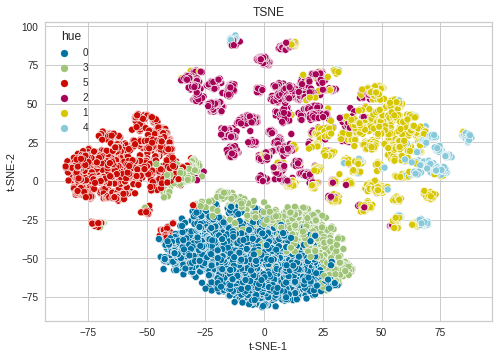

In [ ]:
kmeans_SilhouetteVisualizer_tsne(x_train, t, 6)

## GMM

In [ ]:
def count_clustering_scores1(X, cluster_num, model_class, score_fun):
    # Napiszmy tę funkcje tak ogólnie, jak to możliwe. 
    # Zwróćcie uwagę na przekazanie obiektów typu callable: model i score_fun.
    if isinstance(cluster_num, int):
        cluster_num_iter = [cluster_num]
    else:
        cluster_num_iter = cluster_num
        
    scores = []    
    for k in cluster_num_iter:
        model_instance = model_class(n_components=k)
        labels = model_instance.fit_predict(X)
        wcss = score_fun(X, labels)
        scores.append(wcss)
    
    if isinstance(cluster_num, int):
        return scores[0]
    else:
        return scores

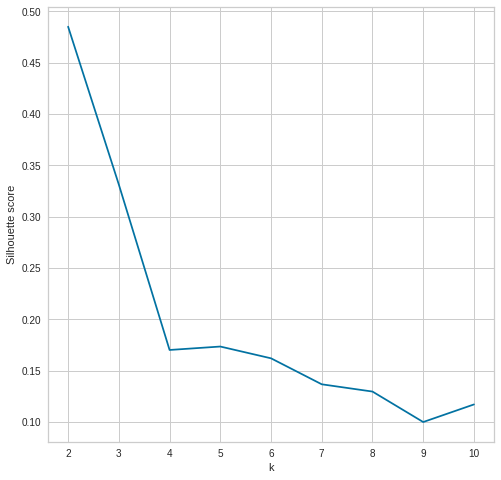

In [ ]:
from sklearn.mixture import GaussianMixture

cluster_num_seq = range(2, 11)
silhouette_vec = count_clustering_scores1(x_train, cluster_num_seq, GaussianMixture, silhouette_score)
f = plt.figure(figsize=(8, 8))
plt.plot(cluster_num_seq, silhouette_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.show()

In [ ]:
def plot_gmm(X, t, n):
    gmm = GaussianMixture(n_components=n)
    gmm.fit(X)
    labels = [str(x) for x in gmm.predict(X)]

    t1 = t.copy()
    t1['hue'] = labels

    sns.scatterplot(data = t1, x = 't-SNE-1', y = 't-SNE-2', hue = 'hue')
    plt.title('TSNE')
    plt.show()

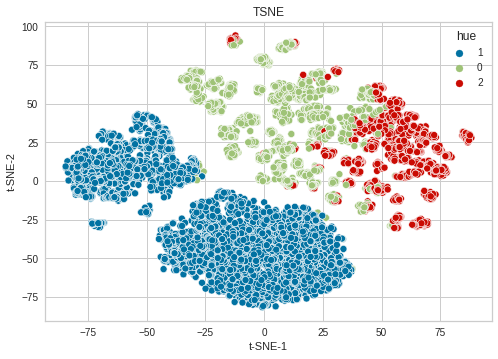

In [ ]:
plot_gmm(x_train, t, 3)

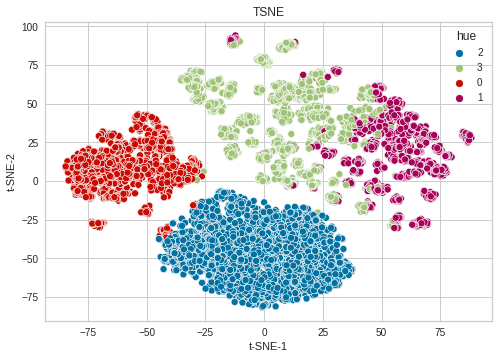

In [ ]:
plot_gmm(x_train, t, 4)

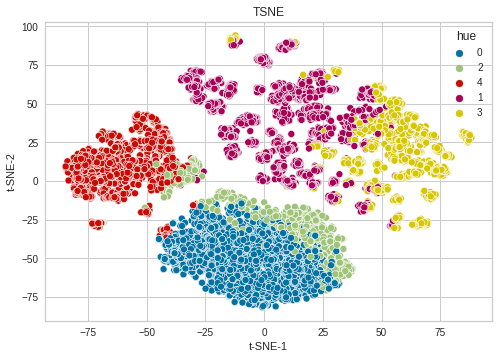

In [ ]:
plot_gmm(x_train, t, 5)

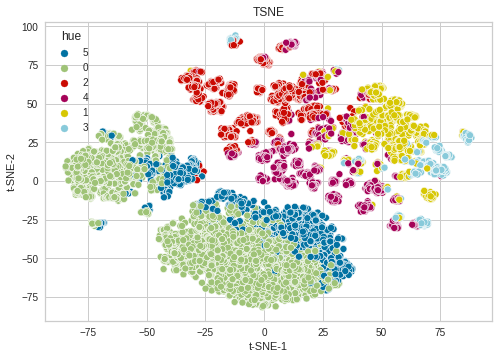

In [ ]:
plot_gmm(x_train, t, 6)

KMeans i GMM dają bardzo podobne wyniki

## Algorytm aglomeracyjny

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import KernelPCA
from sklearn.metrics import silhouette_score as sc
import seaborn as sns

In [ ]:
def plot_kernel_results(kernel):
    kpca = KernelPCA(kernel=kernel, n_components=5, n_jobs=-1)
    x_train_t = kpca.fit_transform(x_train)
    rows = []
    for linkage in ['ward', 'complete', 'average', 'single']:
        for k in range(2, 11):
            model = AgglomerativeClustering(n_clusters=k, linkage=linkage)
            model.fit(x_train_t)
            sh_score = sc(x_train_t, model.labels_)
            rows.append({'linkage':linkage, 'k':k, 'sh_score':sh_score})
    scores_df = pd.DataFrame(rows)
    fig, ax = plt.subplots(figsize=(12, 8))
    sns.barplot(x='linkage', y='sh_score', hue='k', data=scores_df)
    plt.axhline(y=0.56, linestyle='--', color='r')
    plt.grid(True)

In [ ]:
kpca = KernelPCA(kernel='rbf', n_components=5, n_jobs=-1)
x_train_t = kpca.fit_transform(x_train)

In [ ]:
rows = []
for linkage in ['ward', 'complete', 'average', 'single']:
    for k in range(2, 11):
        model = AgglomerativeClustering(n_clusters=k, linkage=linkage)
        model.fit(x_train_t)
        sh_score = sc(x_train_t, model.labels_)
        rows.append({'linkage':linkage, 'k':k, 'sh_score':sh_score})
scores_df = pd.DataFrame(rows)

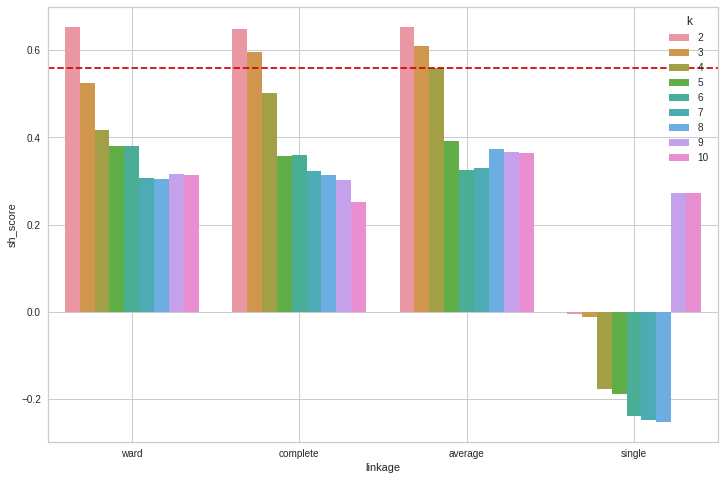

In [ ]:
plot_kernel_results('rbf')

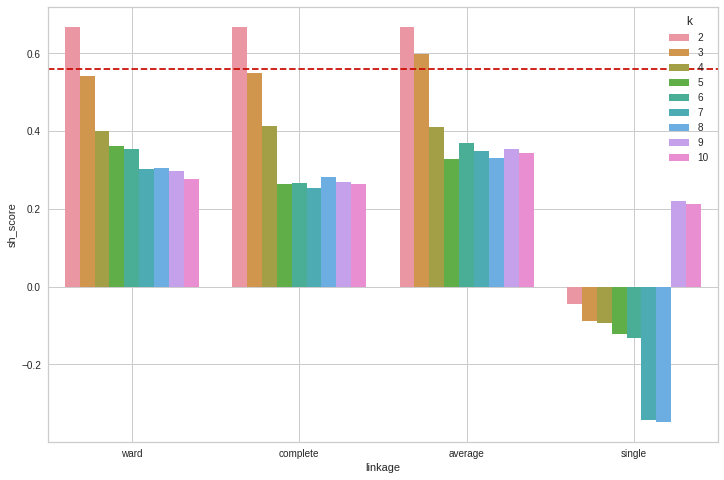

In [ ]:
plot_kernel_results('poly')

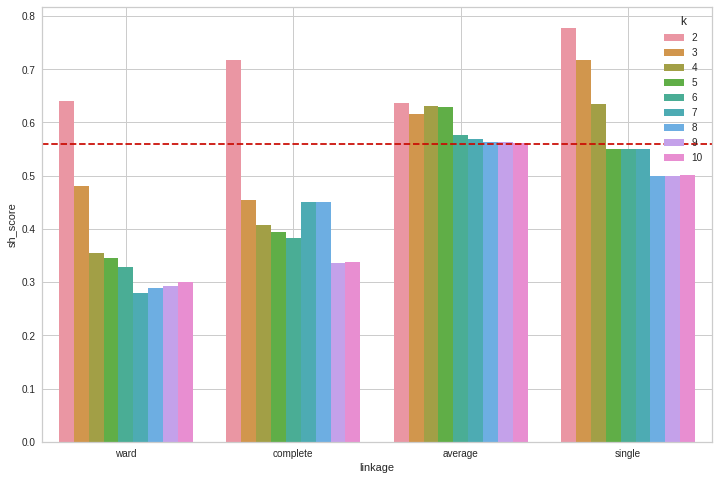

In [ ]:
plot_kernel_results('sigmoid')

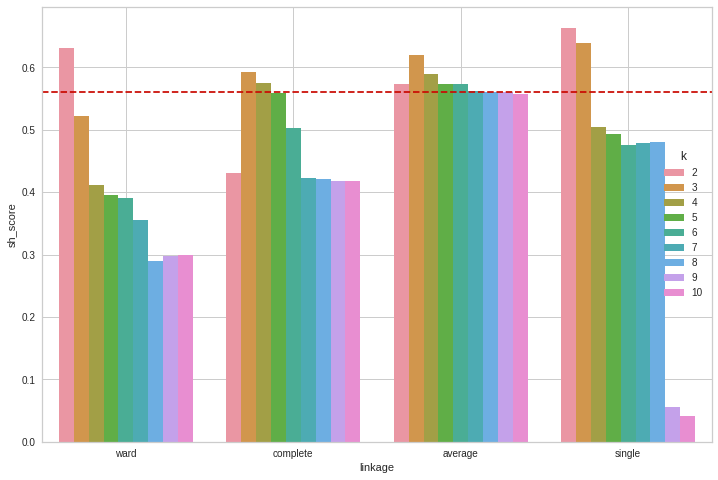

In [ ]:
plot_kernel_results('cosine')

Prawie we wszystkich przypadkach najwyższy wynik jest osiągany dla dwóch klastrów, a dalsze dzielenie nie powoduje znacznej zmiany.

Spójrzmy na jeden z wyników, który wydaje się, ze daje dobre wyniki.

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import KernelPCA
from sklearn.metrics import silhouette_score as sc

kpca = KernelPCA(kernel='sigmoid', n_components=5, n_jobs=-1)
x_train_t = kpca.fit_transform(x_train)
model = AgglomerativeClustering(n_clusters=4, linkage='average')
model.fit(x_train_t)
sc(x_train_t, model.labels_)

0.6314202392289707

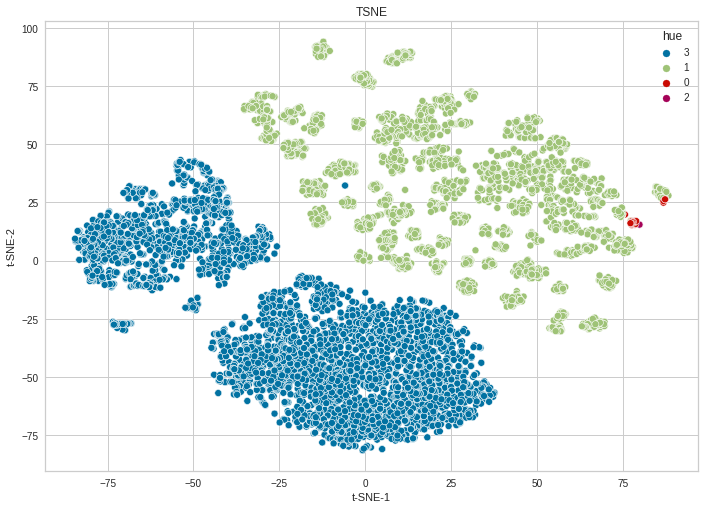

In [ ]:
t1 = t.copy()
t1['hue'] = [str(x) for x in model.labels_]
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.scatterplot(data = t1, x = 't-SNE-1', y = 't-SNE-2', hue = 'hue')
plt.title('TSNE')
plt.show()

Jak widać, algorytm słabo sobie poradził, wydzielił tylko dwa główne klastry, a pozostałe dwa są mało liczne i słabo widoczne.

Ostatecznie, do ostatecznego porównania wybieramy KMeans z czteroma klastrami (GMM dawał bardzo podobne wyniki) oraz powyższy algorytm aglomeracyjny z powodu wyskokiej wartości silhouette score.

## Prawdziwe dane



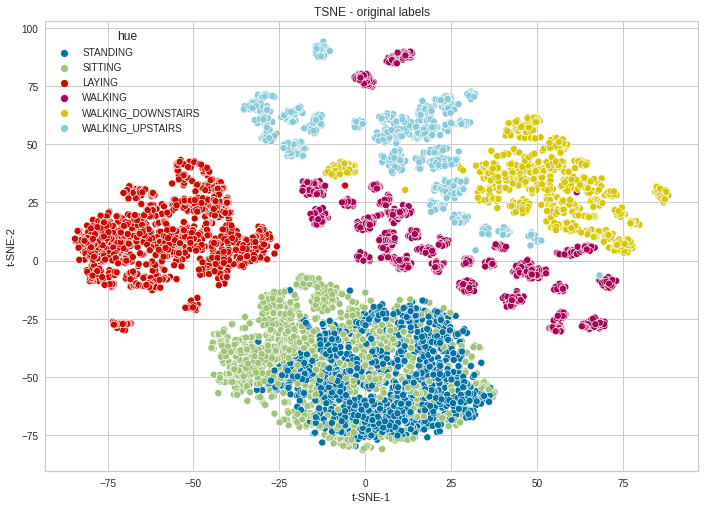

In [ ]:
y_train = pd.read_csv('./UCI_HAR_Dataset/train/y_train.txt', header=None)
y_test = pd.read_csv('./UCI_HAR_Dataset/test/y_test.txt', header=None)

y_train.columns = ['y']
y_test.columns = ['y']

with open('./UCI_HAR_Dataset/activity_labels.txt') as f:
    labels = f.readlines()
    labels = [x.split()[1] for x in labels]
    
y_train['y'] = y_train['y'].apply(lambda x: labels[x - 1])
y_test['y'] = y_test['y'].apply(lambda x: labels[x - 1])

t1 = t.copy()
t1['hue'] = y_train
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.scatterplot(data = t1, x = 't-SNE-1', y = 't-SNE-2', hue = 'hue')
plt.title('TSNE - original labels')
plt.show()

Wybrany Kmeans

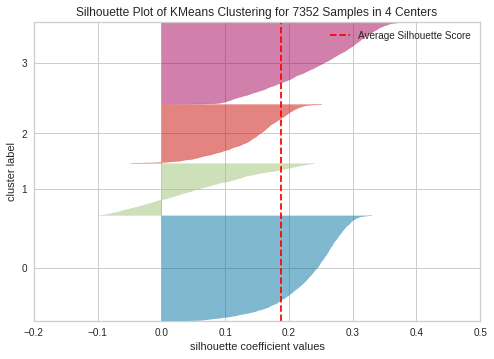

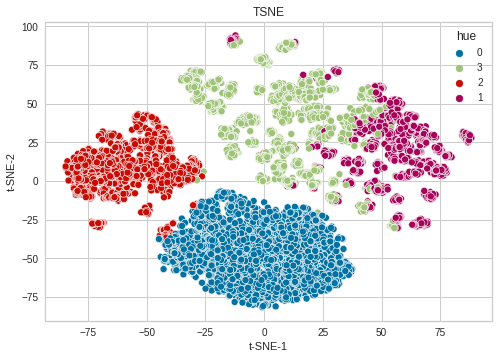

In [ ]:
kmeans_SilhouetteVisualizer_tsne(x_train, t, 4)

Wybrany algorytm aglomeracyjny

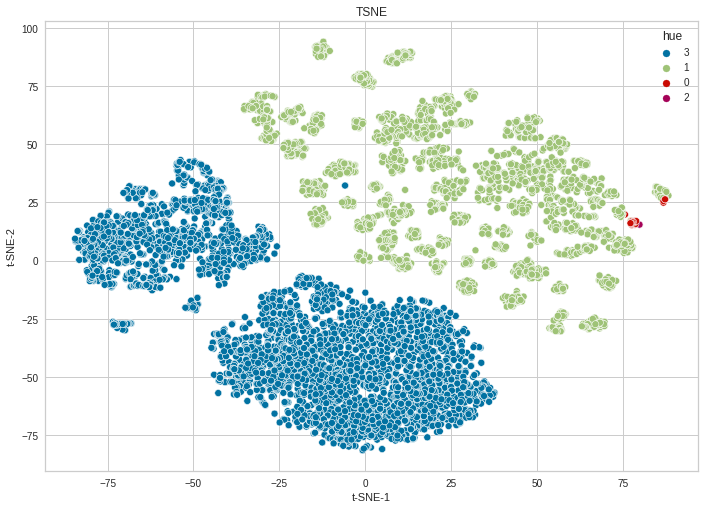

In [ ]:
kpca = KernelPCA(kernel='sigmoid', n_components=5, n_jobs=-1)
x_train_t = kpca.fit_transform(x_train)
model = AgglomerativeClustering(n_clusters=4, linkage='average')
model.fit(x_train_t)

t1 = t.copy()
t1['hue'] = [str(x) for x in model.labels_]
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.scatterplot(data = t1, x = 't-SNE-1', y = 't-SNE-2', hue = 'hue')
plt.title('TSNE')
plt.show()

Ostatecznie, wygląda na to, że KMeans poradził sobie najlepiej z tym zadaniem

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=506946ac-f102-4e2e-b0cb-b48c8097449e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>